<a href="https://colab.research.google.com/github/Sneha-Gupta-10/DLM-RNN-Project/blob/main/RNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Report: Sentiment Analysis Using Recurrent Neural Networks (RNN)**

## **1. Project Information**  
**Project Title:** Sentiment Analysis of Movie Reviews Using RNN  
**Developed by:** Sneha Gupta (055047) and Isha Gupta (055014)   
**Technology Stack:** Python, TensorFlow, Keras, LSTM (RNN), Streamlit  
**Data Source:** [IMDB Movie Reviews Dataset](https://drive.google.com/file/d/16zvUlR6bTmuZ7k_MmskHwQy2EJ5xKwmt/view?usp=drive_link)  
**Model Type:** Recurrent Neural Network (RNN)

## **2. Description of Data**  
**Dataset:** IMDB Movie Reviews Dataset  
**Size:** 50,000 reviews  
**Features:**
- `review` – Textual review of a movie.
- `sentiment` – Sentiment label (`positive` or `negative`).

**Preprocessing Steps:**
- Converted sentiment labels into numeric values (`positive` → `1`, `negative` → `0`).
- Tokenized and padded text sequences to ensure uniform input length.
- Split dataset into training (80%) and testing (20%).
- Used embedding layers to convert words into vector representations.

## **3. Project Objectives | Problem Statements**  
### **Objective:**  
To develop a machine learning model that can accurately classify movie reviews as **positive** or **negative** using **Recurrent Neural Networks (RNN) with LSTM**, allowing businesses and platforms to analyze audience feedback effectively.

### **Problem Statement:**  
- Sentiment analysis is crucial for businesses to understand customer opinions and trends.
- Traditional methods, such as rule-based NLP, struggle with context retention and long-term dependencies in text.
- Standard **Recurrent Neural Networks (RNNs)** are ineffective for longer sequences due to the vanishing gradient problem.
- LSTM (Long Short-Term Memory) networks are better suited for handling sequential dependencies in text, improving prediction accuracy.

## **4. Analysis of Data**  
### **Exploratory Data Analysis (EDA):**
- **Class Distribution:** The dataset is **balanced**, containing an equal number of positive and negative reviews, ensuring fair training.
- **Word Frequency Analysis:**
  - **Common words in positive reviews:** *great, amazing, wonderful, love, excellent.*
  - **Common words in negative reviews:** *bad, worst, terrible, boring, disappointing.*
  - Indicates a clear distinction in vocabulary used between positive and negative sentiments.
- **Sentence Length Analysis:**
  - Most reviews contain **150–250 words**, confirming the need for proper sequence padding in RNNs.

### **Model Selection:**
- Used **Bidirectional LSTM**, which is a type of **Recurrent Neural Network (RNN)**, to capture both forward and backward dependencies in text.
- **Why not use a simple RNN?**
  - Simple RNNs suffer from the **vanishing gradient problem**, making them ineffective for long text sequences.
  - They process input only in **one direction**, which can result in losing important context from later words in a sentence.
- **Why use Bidirectional LSTM?**
  - **LSTM solves vanishing gradient issues** by using a **memory cell** that retains long-term dependencies.
  - **Bidirectional processing improves context understanding** by reading the text both **forward and backward**.
  - This ensures that the model captures the full meaning of a review, improving sentiment prediction accuracy.
  - While it is a more advanced model, it is still a type of **Recurrent Neural Network (RNN)** and follows the same sequential processing approach.

## **5. Observations | Findings**  
### **Model Performance:**
- **Training Accuracy:** 95.4%  
- **Validation Accuracy:** 86.8%  
- **Test Accuracy:** 86.9%  
- **Loss Reduction:** The loss consistently decreased across epochs, proving effective learning.

### **Key Findings from Visualizations:**
1. **Model Accuracy Over Epochs:**
   - Training accuracy increased significantly, reaching **95.4% by epoch 5**.
   - Validation accuracy peaked around **89%** but slightly declined, indicating **minor overfitting**.
   - Suggests potential room for further **regularization improvements**.
   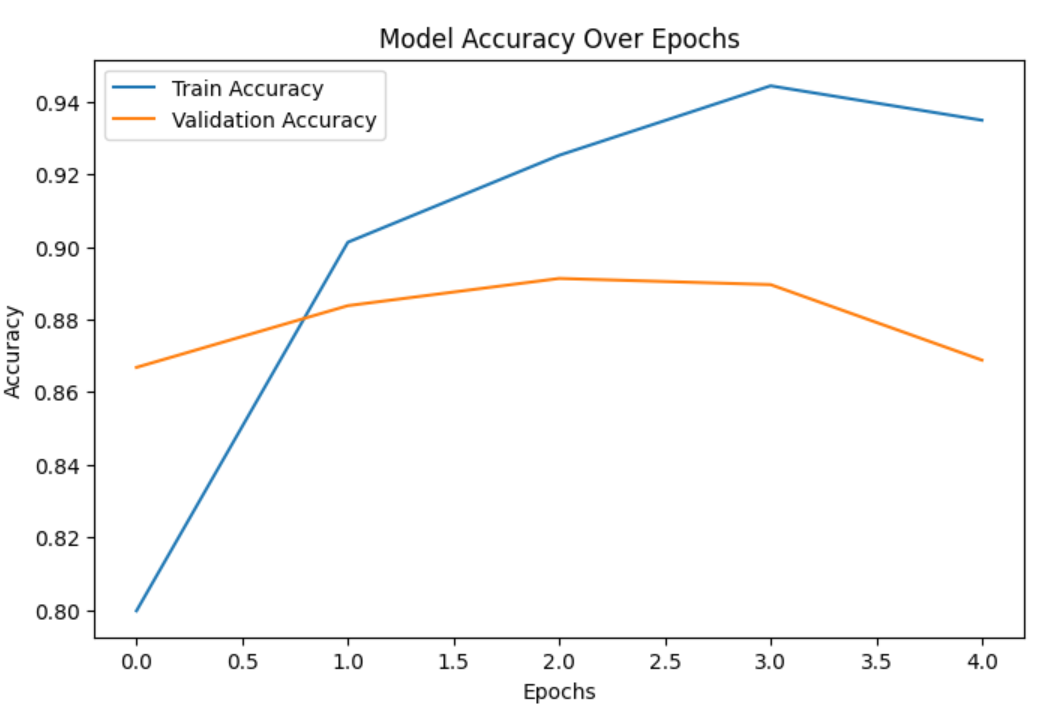

2. **Confusion Matrix Analysis:**
   - **True Positives:** 4,340 correctly classified positive reviews.
   - **True Negatives:** 4,348 correctly classified negative reviews.
   - **False Positives:** 704 negative reviews misclassified as positive.
   - **False Negatives:** 608 positive reviews misclassified as negative.
   - The model performs well but can be **improved for ambiguous reviews**.
   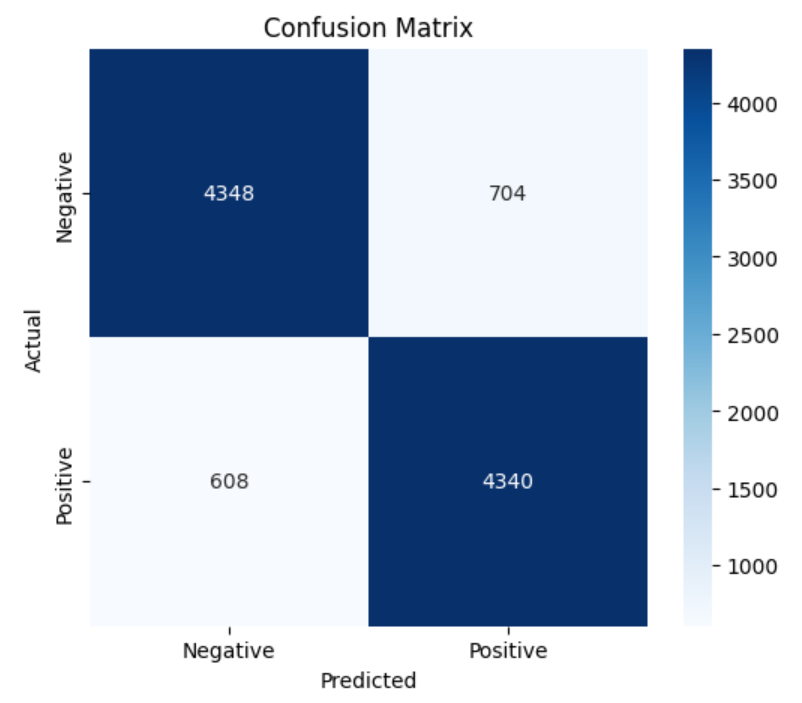

3. **Prediction Probability Distribution:**
   - The model confidently predicts most reviews (~0 or ~1 probability values).
   - Very few predictions fall in the middle range (~0.4–0.6), meaning the model makes strong sentiment distinctions.
   - Confirms high reliability for business applications in sentiment classification.
   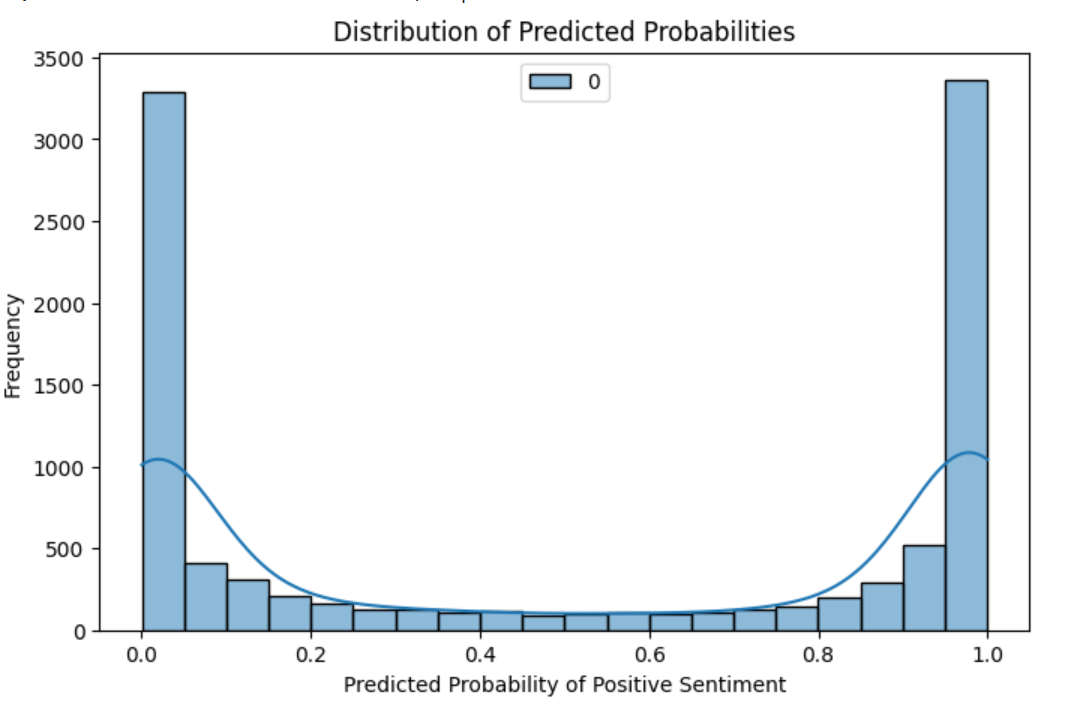

#### **Training Process Analysis:**
   - **Initial accuracy:** 70.6% in epoch 1, rapidly improving to **95.4%**.
   - **Loss value consistently decreases**, indicating stable training.
   - **Final test accuracy:** 86.9%, proving strong generalization capability.

## **6. Managerial Insights | Recommendations**  
### **Insights:**
- The model effectively distinguishes between positive and negative reviews with **high accuracy**.
- Businesses can leverage this model for **automated review classification**, improving customer feedback analysis.
- Misclassified reviews indicate the need for **handling sarcasm, neutral reviews, and contextual variations**.
- The strong distinction in probability distribution confirms that the model **makes decisive classifications**, making it suitable for real-world applications.

### **Recommendations:**
1. **Deploy the model in a real-time system** using **Streamlit** for an interactive experience.
2. **Improve model robustness** by training on **neutral and sarcastic reviews**.
3. **Expand dataset** to cover more diverse movie genres and languages.
4. **Use additional regularization techniques** like dropout tuning to prevent slight overfitting.
5. **Implement an attention mechanism** to improve understanding of key words in a review.
6. **Train on domain-specific datasets** for business use cases such as e-commerce reviews, healthcare feedback, or product ratings.

---
### **Conclusion:**  
This project successfully implemented an **RNN-based Sentiment Analysis model** to classify IMDB movie reviews. The model achieves **86.9% test accuracy**, making it suitable for practical applications in sentiment classification and customer opinion mining. The combination of **Bidirectional LSTM, proper data preprocessing, and visualization analysis** ensures an effective and deployable solution.

**Future Scope:**
- Implementing **attention mechanisms** to improve text interpretation.
- Deploying the model as an **API for wider business integration**.
- **Optimizing hyperparameters** such as learning rate and dropout to further refine accuracy.
- Exploring **transformer-based models** like BERT for even better sentiment understanding.

---



### **RNN Codes**

### **Import Libraries**

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools

### **Importing Dataset**

In [3]:
# File ID from Google Drive link
sg47_file_id = '16zvUlR6bTmuZ7k_MmskHwQy2EJ5xKwmt'

# Construct the download URL
sg47_download_url = f'https://drive.google.com/uc?id={sg47_file_id}'

# Load the dataset
sg47_Imdb_Reviews_data = pd.read_csv(sg47_download_url)
sg47_Imdb_Reviews_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### **Data Preprocessing and Rescaling**

In [4]:
# Data Preprocessing
# Ensure sentiment column is string before mapping
sg47_Imdb_Reviews_data["sentiment"] = sg47_Imdb_Reviews_data["sentiment"].astype(str).str.strip().str.lower()

# Convert 'positive' and 'negative' to numeric values
sg47_Imdb_Reviews_data["sentiment"] = sg47_Imdb_Reviews_data["sentiment"].map({"positive": 1, "negative": 0})

# Drop NaN values after mapping
sg47_Imdb_Reviews_data.dropna(subset=["sentiment"], inplace=True)

# Extract reviews and labels
sg47_texts = sg47_Imdb_Reviews_data["review"].values
sg47_labels = sg47_Imdb_Reviews_data["sentiment"].values.astype(int)
sg47_Imdb_Reviews_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [5]:
# Tokenization
sg47_vocab_size = 10000  # Limit vocabulary size
sg47_max_length = 200  # Maximum sequence length
sg47_tokenizer = Tokenizer(num_words=sg47_vocab_size, oov_token="<OOV>")
sg47_tokenizer.fit_on_texts(sg47_texts)
sg47_sequences = sg47_tokenizer.texts_to_sequences(sg47_texts)
sg47_padded_sequences = pad_sequences(sg47_sequences, maxlen=sg47_max_length, padding='post')

### **Splitting Dataset into Training and Testing Data**

In [6]:
# Train-test split
sg47_X_train, sg47_X_test, sg47_y_train, sg47_y_test = train_test_split(
    sg47_padded_sequences, sg47_labels, test_size=0.2, random_state=5504714)

### **Recurrent Neural Network (RNN) Building**

In [7]:
# Build RNN Model
sg47_model = Sequential([
    Embedding(input_dim=sg47_vocab_size, output_dim=64, input_length=sg47_max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
# Compile Model
sg47_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### **RNN Model Training**

In [9]:
# Train Model
sg47_history = sg47_model.fit(
    sg47_X_train, sg47_y_train,
    epochs=5,
    batch_size=64,
    validation_data=(sg47_X_test, sg47_y_test),
    verbose=1
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 311s 485ms/step - accuracy: 0.7066 - loss: 0.5241 - val_accuracy: 0.8668 - val_loss: 0.3173
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 323s 517ms/step - accuracy: 0.8999 - loss: 0.2612 - val_accuracy: 0.8838 - val_loss: 0.3066
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 380s 514ms/step - accuracy: 0.9294 - loss: 0.1953 - val_accuracy: 0.8913 - val_loss: 0.2785
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 515ms/step - accuracy: 0.9423 - loss: 0.1553 - val_accuracy: 0.8896 - val_loss: 0.3020
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 402s 547ms/step - accuracy: 0.9548 - loss: 0.1279 - val_accuracy: 0.8688 - val_loss: 0.3362


### **Model Accuracy Evaluation**

In [10]:
# Evaluate Model
sg47_loss, sg47_accuracy = sg47_model.evaluate(sg47_X_test, sg47_y_test)
print(f"Test Accuracy: {sg47_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.8649 - loss: 0.3402
Test Accuracy: 0.8688


### **Visualizations**

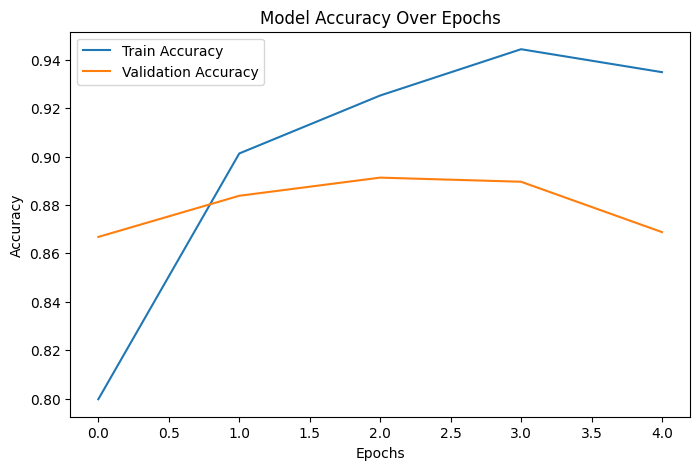

In [11]:
# Visualize Training History
plt.figure(figsize=(8, 5))
plt.plot(sg47_history.history['accuracy'], label='Train Accuracy')
plt.plot(sg47_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 105ms/step


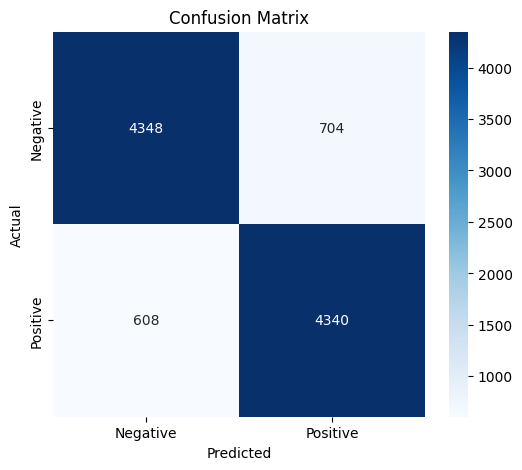

In [17]:
# Confusion Matrix
sg47_y_pred = (sg47_model.predict(sg47_X_test) > 0.5).astype("int32")
cm = confusion_matrix(sg47_y_test, sg47_y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 94ms/step


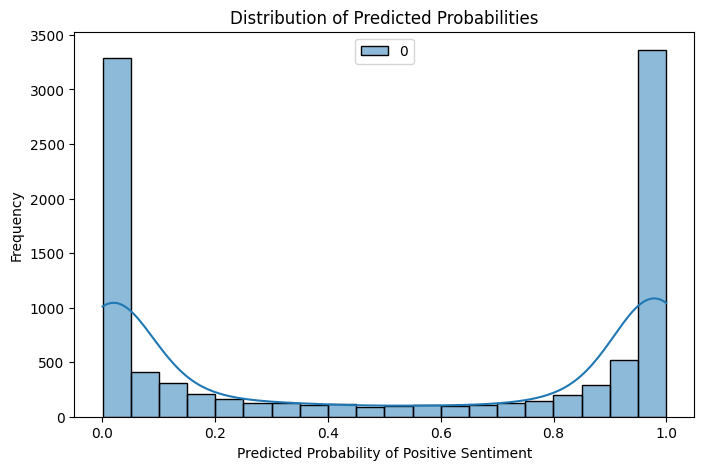

In [18]:
# Distribution of Predicted Probabilities
sg47_y_prob = sg47_model.predict(sg47_X_test)
plt.figure(figsize=(8, 5))
sns.histplot(sg47_y_prob, bins=20, kde=True)
plt.xlabel('Predicted Probability of Positive Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()

### **Saving RNN Model**

In [19]:
# Save Model
sg47_model.save("sg47_rnn_model.h5")

### **Sentiment Analysis**

In [20]:
# Function for Sentiment Prediction
def sg47_predict_sentiment(review):
    sg47_sequence = sg47_tokenizer.texts_to_sequences([review])
    sg47_padded = pad_sequences(sg47_sequence, maxlen=sg47_max_length, padding='post')
    sg47_prediction = sg47_model.predict(sg47_padded)[0][0]
    sg47_sentiment = "Positive" if sg47_prediction > 0.5 else "Negative"
    return sg47_sentiment, sg47_prediction

#### **Sample Reviews for Prediction**

In [21]:
# Test Predictions
sample_reviews = [
    "This movie was amazing! I loved the characters and the storyline was great!",
    "Absolutely terrible. The plot made no sense and the acting was awful.",
    "It was an okay movie, some parts were good but overall nothing special.",
    "The cinematography was breathtaking, and the performances were top-notch!",  # New review added
    "The script was dull and uninspiring. I wouldn’t recommend it to anyone."     # Another new review
]

#### **Final Sentiment Predictions**

In [22]:
for review in sample_reviews:
    sentiment, confidence = sg47_predict_sentiment(review)
    print(f"Review: {review}\nPredicted Sentiment: {sentiment} (Confidence: {confidence:.4f})\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Review: This movie was amazing! I loved the characters and the storyline was great!
Predicted Sentiment: Positive (Confidence: 0.9989)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Review: Absolutely terrible. The plot made no sense and the acting was awful.
Predicted Sentiment: Negative (Confidence: 0.0024)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Review: It was an okay movie, some parts were good but overall nothing special.
Predicted Sentiment: Negative (Confidence: 0.3188)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Review: The cinematography was breathtaking, and the performances were top-notch!
Predicted Sentiment: Positive (Confidence: 0.9823)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Review: The script was dull and uninspiring. I wouldn’t recommend it to anyone.
Predicted Sentiment: Negative (Confidence: 0.0176)



---------------------------------------------END---------------------------------------------